In [ ]:
!sudo pip3 install keras


In [2]:
import numpy as np
# hàm này để hiển thị các tấm ảnh
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
# để chọn ngẫu nhiên các tấm ảnh
import random
import os
# để load dữ liệu trong tập mẫu
from keras.datasets import cifar10
from keras.models import load_model
from matplotlib import image
# các hàm sau để xây dựng mô hình mạng neural
# thêm 1 lớp, thêm hàm kích hoạt activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dropout
from keras.layers import Dense, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, optimizers, losses, metrics

In [3]:
#Tải tập dữ liệu
(X_train, y_train), (X_test,y_test) = cifar10.load_data()


In [4]:
def load_image(filename):
  # load tấm ảnh lên
  img = load_img(filename, grayscale=True, target_size=(32, 32))
  # chuyển về dạng vector
  img=img_to_array(img)
	# điều chỉnh kích thước thành một mảng 2D có kích thước (3, 1024)
  img=img.reshape(3,1024)
  img=img.astype('float32')
  #chuẩn hóa dữ liệu về 0-1
  img=img/255.0
  return img

In [5]:
#có 50000 hình ảnh đào tạo và có 10000 hình ảnh thử nghiệm
#chiều cao, chiều rộng , 3 kênh màu R,G,B
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape
#Có 50000 giá trị tương ứng với 50000 tấm ảnh train

(50000, 1)

In [8]:
#y_train là một mảng 2D ,vì việc phân loại mảng 1D đủ tốt nên chúng ta chuyển đổi về mảng 1D
y_train = y_train.reshape(-1)

In [9]:
#y_test cũng tương tự
y_test = y_test.reshape(-1)

In [1]:
#Danh sách  gồm các phần tử
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
#vẽ một số hình ảnh để xem chúng là gì
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

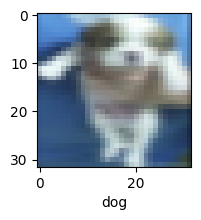

In [12]:
plot_sample(X_train, y_train, 83)

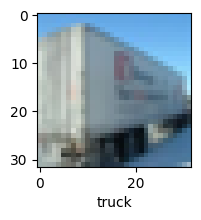

In [13]:
plot_sample(X_train, y_train, 15)

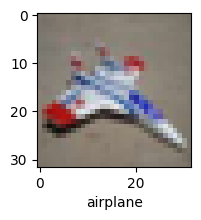

In [14]:
plot_sample(X_train, y_train, 30)

In [4]:
from tensorflow.keras import models, layers, optimizers, callbacks, regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chuẩn hóa hình ảnh
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [16]:
# Khởi tạo ImageDataGenerator với các phép biến đổi dữ liệu
datagen = ImageDataGenerator(
    rotation_range=20,              # Góc xoay ảnh trong khoảng ±20 độ
    width_shift_range=0.2,          # Dịch chuyển ngang ảnh theo chiều rộng, tỷ lệ 20%
    height_shift_range=0.2,         # Dịch chuyển ngang ảnh theo chiều cao, tỷ lệ 20%
    horizontal_flip=True            # Lật ảnh ngang
)

# Áp dụng phương pháp fit để tính toán thống kê bằng cách sử dụng dữ liệu
datagen.fit(X_train)

In [17]:
from tensorflow.keras import models, layers, regularizers

# Xây dựng mô hình CNN
cnn = models.Sequential([
    # Lớp tích chập đầu tiên với 32 bộ lọc, kernel size 3x3, hàm kích hoạt ReLU, padding 'same'
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),  # Lớp chuẩn hóa batch
    layers.MaxPooling2D((2, 2)),  # Lớp pooling 2x2
    layers.Dropout(0.25),         # Lớp dropout với tỉ lệ 0.25

    # Lớp tích chập thứ hai với 64 bộ lọc, kernel size 3x3, hàm kích hoạt ReLU, padding 'same'
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Lớp chuẩn hóa batch
    layers.MaxPooling2D((2, 2)),  # Lớp pooling 2x2
    layers.Dropout(0.25),         # Lớp dropout với tỉ lệ 0.25

    # Lớp tích chập thứ ba với 128 bộ lọc, kernel size 3x3, hàm kích hoạt ReLU, padding 'same'
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Lớp chuẩn hóa batch
    layers.MaxPooling2D((2, 2)),  # Lớp pooling 2x2
    layers.Dropout(0.25),         # Lớp dropout với tỉ lệ 0.25

    # Lớp tích chập thứ tư với 256 bộ lọc, kernel size 3x3, hàm kích hoạt ReLU, padding 'same'
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Lớp chuẩn hóa batch
    layers.MaxPooling2D((2, 2)),  # Lớp pooling 2x2
    layers.Dropout(0.25),         # Lớp dropout với tỉ lệ 0.25

    # Lớp tích chập thứ năm với 512 bộ lọc, kernel size 3x3, hàm kích hoạt ReLU, padding 'same'
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Lớp chuẩn hóa batch
    layers.MaxPooling2D((2, 2)),  # Lớp pooling 2x2
    layers.Dropout(0.25),         # Lớp dropout với tỉ lệ 0.25

    layers.Flatten(),  # Chuyển từ tensor 3D sang tensor 1D
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Lớp fully connected với 512 units, hàm kích hoạt ReLU và regularization L2
    layers.BatchNormalization(),  # Lớp chuẩn hóa batch
    layers.Dropout(0.5),          # Lớp dropout với tỉ lệ 0.5
    layers.Dense(10, activation='softmax')  # Lớp fully connected với 10 units, hàm kích hoạt softmax (cho 10 lớp đầu ra)
])



In [18]:
# Sử dụng Learning Rate Scheduler
# ReduceLROnPlateau: Giảm learning rate khi val_loss không cải thiện sau một số epochs
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Theo dõi độ đo val_loss
    factor=0.5,          # Giảm learning rate đi một nửa
    patience=5,          # Số epochs không cải thiện trước khi giảm learning rate
    min_lr=0.00001       # Learning rate tối thiểu
)

# Sử dụng EarlyStopping
# EarlyStopping: Dừng huấn luyện sớm nếu val_loss không cải thiện
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',             # Theo dõi độ đo val_loss
    patience=10,                    # Số epochs không cải thiện trước khi dừng huấn luyện
    restore_best_weights=True       # Khôi phục trọng số tốt nhất trước khi dừng
)

# Sử dụng optimizer AdamW với gradient clipping
# AdamW: Optimizer với weight decay và gradient clipping
optimizer = optimizers.AdamW(
    learning_rate=0.001,   # Tốc độ học
    weight_decay=1e-5,     # Lượng giảm trọng số để tránh overfitting
    clipvalue=1.0          # Giá trị tối đa cho gradient để tránh gradient explosion
)

In [19]:
# Huấn luyện mô hình CNN
cnn.compile(
    optimizer=optimizer,  # Sử dụng optimizer đã được định nghĩa trước đó (ví dụ: AdamW)
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Hàm mất mát
    metrics=['accuracy']  # Đánh giá mô hình theo độ chính xác
)

# Huấn luyện mô hình với dữ liệu được tạo ra bằng data augmentation
history = cnn.fit(
    datagen.flow(X_train, y_train, batch_size=64),  # Generator của dữ liệu huấn luyện với batch_size là 64
    epochs=40,  # Số lượng epochs
    validation_data=(X_test, y_test),  # Dữ liệu validation
    callbacks=[early_stopping, lr_scheduler]  # Các callbacks để điều chỉnh learning rate và early stopping
)

Epoch 1/40
782/782 [==============================] - 50s 49ms/step - loss: 2.4502 - accuracy: 0.3258 - val_loss: 3.0212 - val_accuracy: 0.2545 - lr: 0.0010
Epoch 2/40
782/782 [==============================] - 32s 41ms/step - loss: 1.7887 - accuracy: 0.4532 - val_loss: 1.5284 - val_accuracy: 0.5202 - lr: 0.0010
Epoch 3/40
782/782 [==============================] - 34s 43ms/step - loss: 1.4963 - accuracy: 0.5117 - val_loss: 1.3733 - val_accuracy: 0.5491 - lr: 0.0010
Epoch 4/40
782/782 [==============================] - 32s 41ms/step - loss: 1.3486 - accuracy: 0.5541 - val_loss: 1.2780 - val_accuracy: 0.5707 - lr: 0.0010
Epoch 5/40
782/782 [==============================] - 33s 42ms/step - loss: 1.2581 - accuracy: 0.5823 - val_loss: 1.3608 - val_accuracy: 0.5698 - lr: 0.0010
Epoch 6/40
782/782 [==============================] - 32s 41ms/step - loss: 1.2019 - accuracy: 0.6040 - val_loss: 1.4952 - val_accuracy: 0.5426 - lr: 0.0010
Epoch 7/40
782/782 [==============================] - 33s 

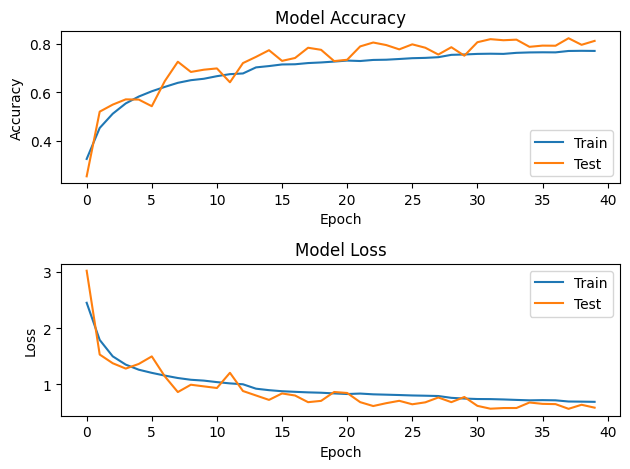

In [20]:
# Vẽ đồ thị accuracy và loss
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.tight_layout()
plt.show()

In [34]:
cnn.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 3ms/step


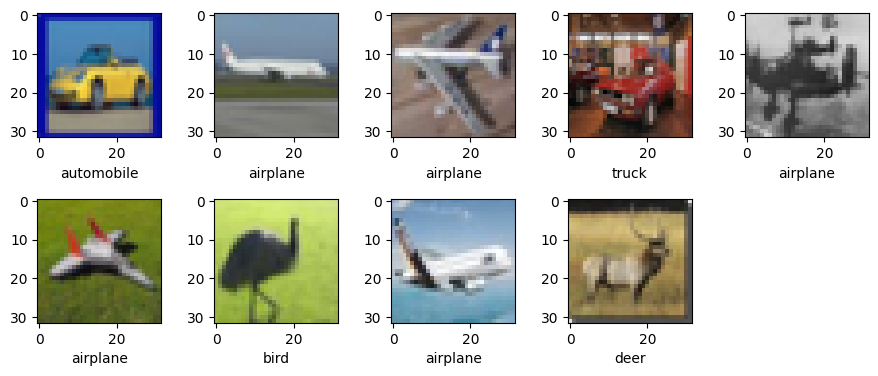

In [21]:
# Hiển thị ngẫu nhiên 9 tấm hình trong tập test và dự đoán
#Hàm này để chọn ngẫu nhiên các tấm ảnh trong tập dữ liệu
import random
import os
predicted_classes=cnn.predict(X_test)
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(5,5,i+1)
  num=random.randint(0,len(X_test))
  plt.imshow(X_test[num])
  y_classes = [np.argmax(element) for element in predicted_classes]
  plt.xlabel(classes[y_classes[num]])
plt.tight_layout()

Chọn 1 hình ảnh để dự đoán:


Saving images (2).jpeg to images (2).jpeg


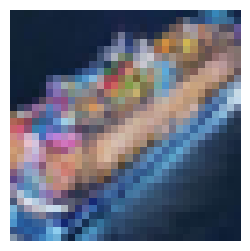

1/1 [==============================] - 0s 25ms/step
Dự đoán hình ảnh: ship với độ chính xác: 99.89%


In [33]:
from google.colab import files
import io
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Hàm tải hình ảnh từ tệp được chọn và hiển thị lên giao diện người dùng
def load_and_predict():
    uploaded = files.upload()
    for filename in uploaded.keys():
        img_test = load_image(io.BytesIO(uploaded[filename]))
        plt.figure(figsize=(3, 3))  # Đặt kích thước hình ảnh hiển thị
        plt.imshow(img_test[0])
        plt.axis('off')
        plt.show()
        ob = cnn.predict(img_test)
        prediction = np.argmax(ob)
        confidence = np.max(ob) * 100  # Tính xác suất dự đoán chính xác
        print(f'Dự đoán hình ảnh: {classes[prediction]} với độ chính xác: {confidence:.2f}%')

# Hàm để load và chuẩn bị hình ảnh
def load_image(image_bytes):
    image = Image.open(image_bytes)
    image = image.resize((32, 32))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    img = image.astype('float32')
    img = img / 255.0
    return img

# Biến classes
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Tạo nút để chọn hình ảnh và dự đoán
print("Chọn 1 hình ảnh để dự đoán:")
load_and_predict()

